In [1]:
"""
            *************************************************************
            *                >> IN THE NAME OF ALLAH <<                 *
            *                   PROJECT RISK ANALYSIS                   *
            *  TIME AND COST MANAGEMENT BASED ON UNCERTAINTY CONDITION  *
            *  USING MONTE-CARLO METHOD WITH BETA PROBABILTY FUNCTION   *
            *-----------------------------------------------------------*
            *     This program is written by Salar Delavar Qashqai      *
            *          E-mail:salar.d.ghashghaei@gmail.com              *
            *************************************************************
"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the project activities and their dependencies
activities = {
    'A': {'cost': (1000, 1500), 'time': (5, 9), 'predecessors': []},
    'B': {'cost': (800, 1200), 'time': (4, 8), 'predecessors': []},
    'C': {'cost': (600, 1000), 'time': (3, 7), 'predecessors': ['A']},
    'D': {'cost': (400, 800), 'time': (2, 6), 'predecessors': ['A']},
    'E': {'cost': (500, 900), 'time': (3, 7), 'predecessors': ['B']},
    'F': {'cost': (300, 700), 'time': (2, 6), 'predecessors': ['B']},
    'G': {'cost': (700, 1100), 'time': (4, 8), 'predecessors': ['C', 'D']},
    'H': {'cost': (600, 1000), 'time': (3, 7), 'predecessors': ['E', 'F']},
    'I': {'cost': (800, 1200), 'time': (4, 8), 'predecessors': ['G', 'H']},
    'J': {'cost': (100, 800), 'time': (3, 10), 'predecessors': ['I']}
}


In [2]:
# Beta PDF for Monte Carlo simulation
def beta_pdf(min_x, max_x):
    a, b = 2, 1
    return min_x + (max_x - min_x) * np.random.beta(a, b)

In [3]:
# Function to plot Gantt chart for time
def plot_gantt_time(quantile, COLOR):
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(10, 6))
    start_time = {activity: 0 for activity in activities}
    
    for activity in sorted(activities, key=lambda x: (len(activities[x]['predecessors']), x)):
        for predecessor in activities[activity]['predecessors']:
            start_time[activity] = max(start_time[activity], start_time[predecessor] + results[predecessor][quantile])
        ax.barh(activity, results[activity][quantile], left=start_time[activity], color=COLOR)
        TIME = start_time[activity] + results[activity][quantile];
        START = start_time[activity];
        FINISH = START + results[activity][quantile];
        ax.text(START, activity, f"S: {START:.2f}", va='center', ha='left')
        ax.text(TIME , activity, f" T: {results[activity][quantile]:.2f}", va='center', ha='left')
        ax.text(FINISH, activity, f"F: {FINISH:.2f}", va='center', ha='right')
    
    ax.set_xlabel('Time')
    ax.set_title(f'Gantt Chart for {quantile} Quantile - Project Total Time: {TIME:.2f}')
    plt.grid();plt.show();
    return TIME

In [4]:
# Define the number of simulations
n_sim = 100000


# Run simulations and store results
results = {activity: {'times': [], 'costs': []} for activity in activities}


for _ in range(n_sim):
    for activity in activities:
        min_time, max_time = activities[activity]['time']
        results[activity]['times'].append(beta_pdf(min_time, max_time))

# Calculate quantiles for each activity
for activity in results:
    results[activity]['10th'] = np.quantile(results[activity]['times'], 0.10)
    results[activity]['25th'] = np.quantile(results[activity]['times'], 0.25)
    results[activity]['50th'] = np.quantile(results[activity]['times'], 0.50)
    results[activity]['75th'] = np.quantile(results[activity]['times'], 0.75)
    results[activity]['90th'] = np.quantile(results[activity]['times'], 0.90)

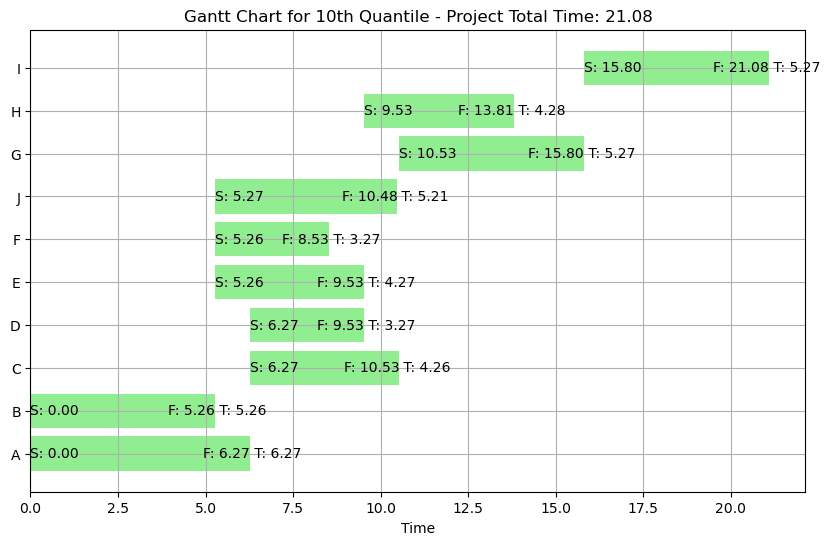

In [5]:
# Plot Gantt chart for 25th, 25th, 50th, 75th and 90th quantiles
time_10 = plot_gantt_time('10th', 'lightgreen')

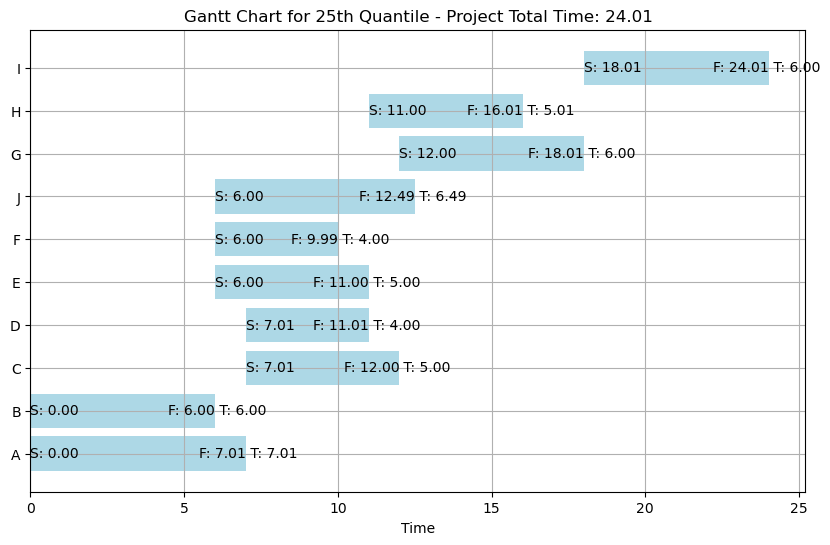

In [6]:
time_25 = plot_gantt_time('25th', 'lightblue')

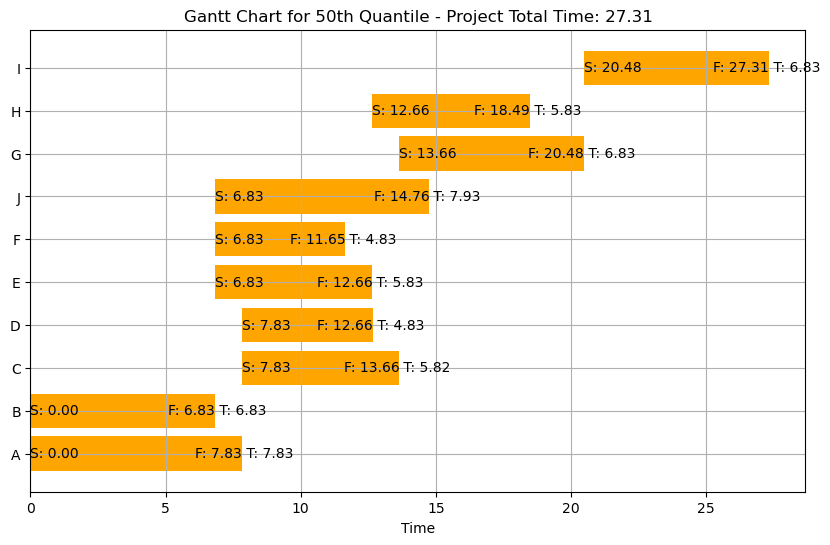

In [7]:
time_50 = plot_gantt_time('50th', 'orange')

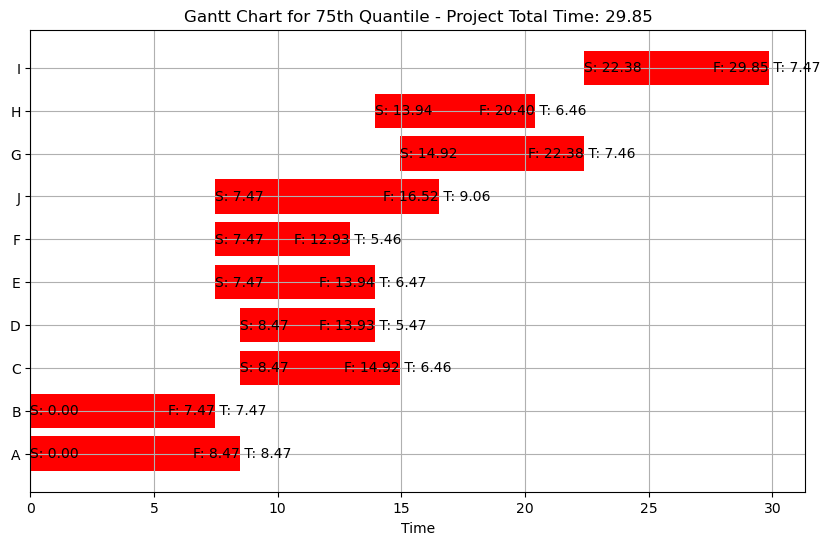

In [8]:
time_75 = plot_gantt_time('75th', 'red')

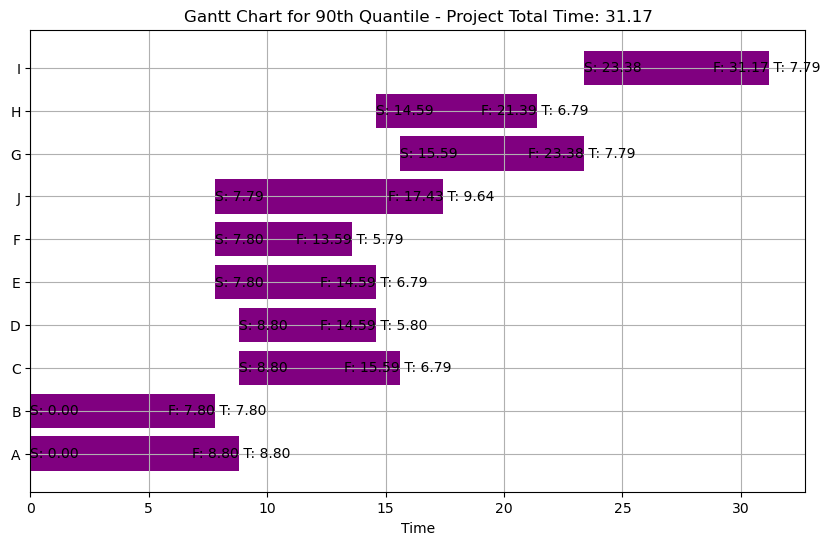

In [9]:
time_90 = plot_gantt_time('90th', 'purple')


In [10]:
# Print project total time for each quantile
print("-------------------- TIME --------------------------")
print(f"Project Total Time for 10th Quantile: {time_10:.2f}")
print(f"Project Total Time for 25th Quantile: {time_25:.2f}")
print(f"Project Total Time for 50th Quantile: {time_50:.2f}")
print(f"Project Total Time for 75th Quantile: {time_75:.2f}")
print(f"Project Total Time for 90th Quantile: {time_90:.2f}")

-------------------- TIME --------------------------
Project Total Time for 10th Quantile: 21.08
Project Total Time for 25th Quantile: 24.01
Project Total Time for 50th Quantile: 27.31
Project Total Time for 75th Quantile: 29.85
Project Total Time for 90th Quantile: 31.17


-------------------- COST --------------------------
Project Total Cost for 10th Quantile: 7191.02 $
Project Total Cost for 25th Quantile: 7998.59 $
Project Total Cost for 50th Quantile: 8909.11 $
Project Total Cost for 75th Quantile: 9611.03 $
Project Total Cost for 90th Quantile: 9974.43 $


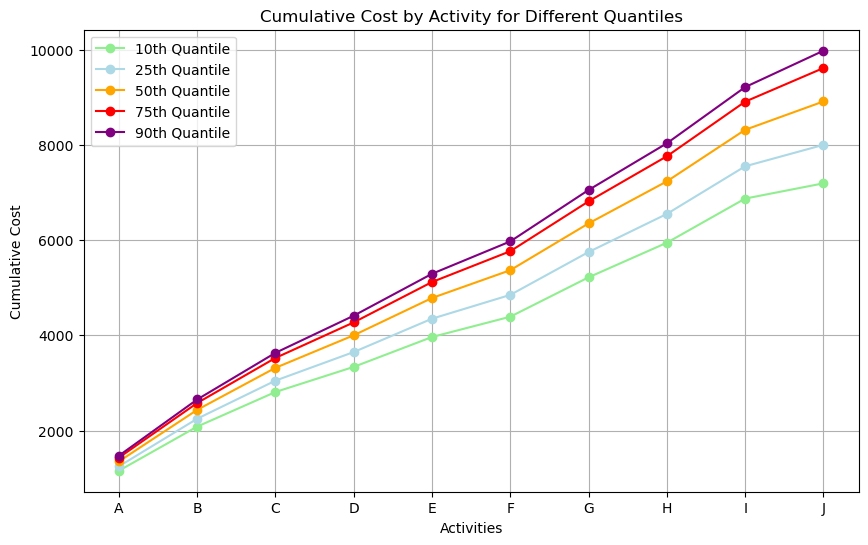

In [11]:
# Print project total cost for each quantile

for _ in range(n_sim):
    for activity in activities:
        min_cost, max_cost = activities[activity]['cost']
        results[activity]['costs'].append(beta_pdf(min_cost, max_cost))

# Calculate quantiles for each activity
for activity in results:
    for quantile in [0.10, 0.25, 0.50, 0.75, 0.90]:
        results[activity][f'{int(quantile*100)}th'] = {
            'cost': np.quantile(results[activity]['costs'], quantile)
        }
        
# Print project total cost for each quantile        
print("-------------------- COST --------------------------")

# Calculate cumulative cost for each quantile
cumulative_costs = {f'{int(quantile*100)}th': [] for quantile in [0.10, 0.25, 0.50, 0.75, 0.90]}
for quantile in [0.10, 0.25, 0.50, 0.75, 0.90]:
    quantile_key = f'{int(quantile*100)}th'
    total_cost = 0
    for activity in activities:
        total_cost += results[activity][quantile_key]['cost']
        cumulative_costs[quantile_key].append(total_cost)
    print(f"Project Total Cost for {quantile_key} Quantile: {total_cost:.2f} $")
        

        
# Plot cumulative costs for each quantile
fig, ax = plt.subplots(figsize=(10, 6))
quantiles = ['10th', '25th', '50th', '75th', '90th']
colors = ['lightgreen', 'lightblue', 'orange', 'red', 'purple']
for i, quantile in enumerate(quantiles):
    ax.plot(list(activities.keys()), cumulative_costs[quantile], label=f'{quantile} Quantile', color=colors[i], marker='o')

ax.set_xlabel('Activities')
ax.set_ylabel('Cumulative Cost')
ax.set_title('Cumulative Cost by Activity for Different Quantiles')
ax.legend();plt.grid(True);plt.show();